In [1]:
import TNG_DA
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# DS+ and Virial Theorem plots

In [2]:
cluster = 3

pos, vel, groups, subhalo_masses, h, halo_mass = TNG_DA.get_cluster_props(cluster)

### Import Data

In [3]:
df_path = "/home/habjan.e/TNG/Data/data_DS+_virial_results/DS+_Virial_df.csv"
df = pd.read_csv(df_path)

subhalo_masses = np.load('/home/habjan.e/TNG/Data/data_DS+_virial_results/subhalo_masses.npy')
dsp_out_1 = np.load('/home/habjan.e/TNG/Data/data_DS+_virial_results/DS+_array_1.npy')
dsp_out_2 = np.load('/home/habjan.e/TNG/Data/data_DS+_virial_results/DS+_array_2.npy')

### Make array of projections

In [4]:
x_proj = np.array(df['Projection x-Direction'])
y_proj = np.array(df['Projection y-Direction'])
z_proj = np.array(df['Projection z-Direction'])

df_proj_arr = np.transpose(np.array([x_proj, y_proj, z_proj]))

### Make a histogram of the Virial mass estimates of the cluster

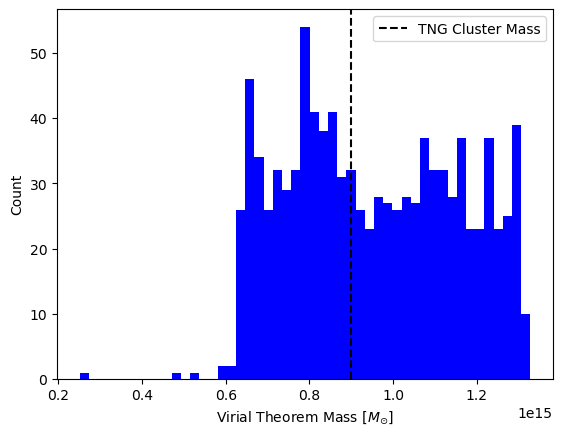

In [5]:
virial_cluster_mass = np.array(df['Virial Halo Mass'])

bins = np.linspace(np.nanmin(virial_cluster_mass), np.nanmax(virial_cluster_mass), 50)

plt.hist(virial_cluster_mass, color='blue', bins=bins);
plt.axvline(halo_mass, c='k', linestyle='--', label='TNG Cluster Mass')

plt.ylabel('Count')
plt.xlabel(r'Virial Theorem Mass [$M_{\odot}$]')

#plt.yscale('log')

plt.legend()

### Compare position distributions

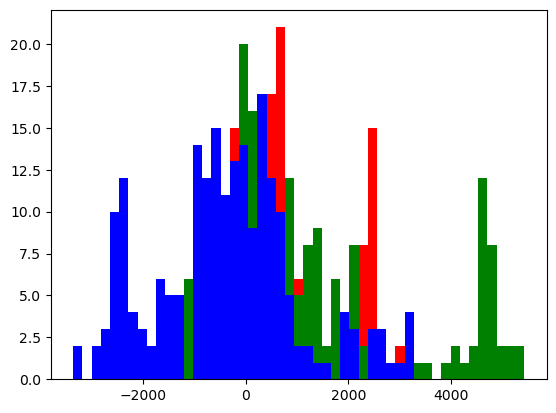

In [6]:
bins = np.linspace(np.nanmin(pos), np.nanmax(pos), 50)

plt.hist(pos[:, 1], color='red', bins=bins);
plt.hist(pos[:, 2], color='green', bins=bins);
plt.hist(pos[:, 0], color='blue', bins=bins);

### Quantifying Trixiality

In [7]:
tri_results = np.transpose(np.array([TNG_DA.compare_3d_2d_shape(pos, vel, df_proj_arr[i]) for i in range(len(df))]))

shape_3d = tri_results[0]
shape_2d = tri_results[1]
tri_metric_arr = tri_results[2]
T = tri_results[3, 0]

### Calculate differences in true 3D velocity dispersion and assumed los velocity dispersion

In [73]:
true_disp_x = np.sum((vel[:, 0] - np.mean(vel[:, 0]))**2) / len(vel[:, 0])
true_disp_y = np.sum((vel[:, 1] - np.mean(vel[:, 1]))**2) / len(vel[:, 1])
true_disp_z = np.sum((vel[:, 2] - np.mean(vel[:, 2]))**2) / len(vel[:, 2])
true_vel_disp = np.sqrt(true_disp_x + true_disp_y + true_disp_z)

los_velocities = np.array([TNG_DA.project_3d_to_2d(pos, vel, df_proj_arr[i])[1] for i in range(df_proj_arr.shape[0])])
vel_los_disp = np.array([np.sqrt((1 / (len(los_velocities[i]) - 1)) * np.sum((los_velocities[i] - np.mean(los_velocities[i]))**2)) for i in range(los_velocities.shape[0])]) * np.sqrt(3)

### Plot mass difference versus the triaxiality metric

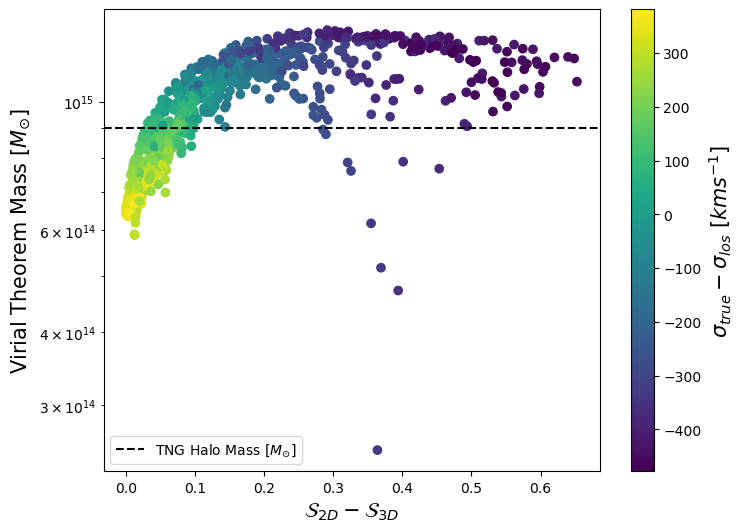

In [78]:
vel_disp_diff = true_vel_disp - vel_los_disp

plt.figure(figsize=(8, 6))

sc = plt.scatter(tri_metric_arr, virial_cluster_mass, c=vel_disp_diff, cmap='viridis')
plt.axhline(halo_mass, c='k', linestyle='--', label=r'TNG Halo Mass [$M_{\odot}$]')

cbar = plt.colorbar(sc)
cbar.set_label(r'$\sigma_{true} - \sigma_{los}$ [$km s^{-1}$]', fontsize = 15)

plt.xlabel(r'$ \mathcal{S}_{2D} - \mathcal{S}_{3D}$', fontsize = 15)
plt.ylabel(r'Virial Theorem Mass [$M_{\odot}$]', fontsize = 15)
plt.legend()
plt.yscale('log')

Text(0, 0.5, 'Virial Theorem Mass [$log_{10}(M_{\\odot})$]')

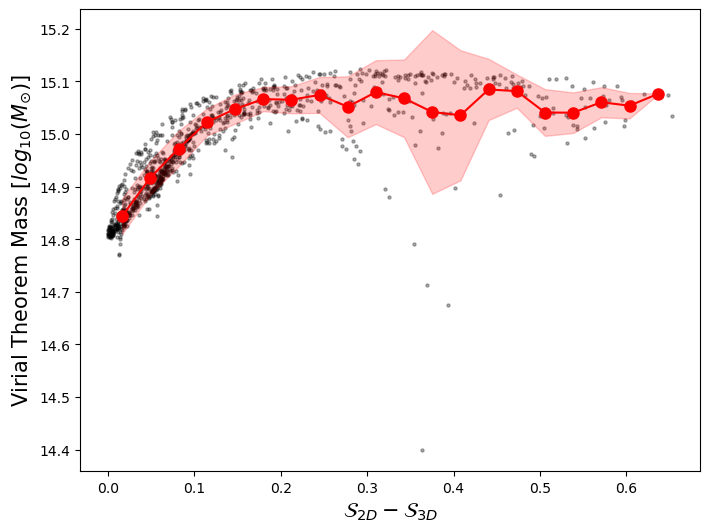

In [40]:
x = tri_metric_arr
y = np.log10(virial_cluster_mass)

num_bins = 20 
bins = np.linspace(min(x), max(x), num_bins + 1)
bin_indices = np.digitize(x, bins) - 1

# Compute statistics per bin (mean, median, etc.)
bin_means = np.array([np.mean(y[bin_indices == i]) if np.any(bin_indices == i) else np.nan for i in range(num_bins)])
bin_std = np.array([np.std(y[bin_indices == i]) if np.any(bin_indices == i) else np.nan for i in range(num_bins)])
bin_centers = (bins[:-1] + bins[1:]) / 2  # Compute bin centers

# Plot original data as scatter
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=5, c ='k', alpha = 0.3)

# Plot binned means as points or line
plt.plot(bin_centers, bin_means, 'ro-', markersize=8)
plt.fill_between(bin_centers, bin_means - bin_std, bin_means + bin_std, color='red', alpha=0.2)

plt.xlabel(r'$ \mathcal{S}_{2D} - \mathcal{S}_{3D}$', fontsize = 15)
plt.ylabel(r'Virial Theorem Mass [$log_{10}(M_{\odot})$]', fontsize = 15)

### Completeness

Text(0, 0.5, 'Completeness')

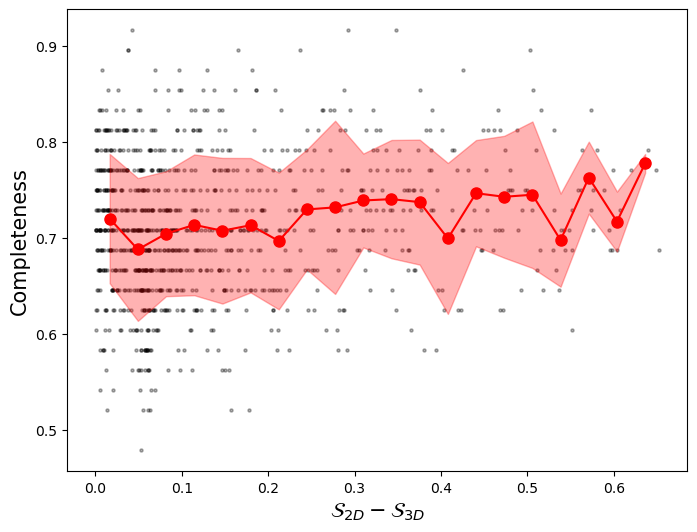

In [41]:
complete = np.array(df['Completeness'])
complete_err = np.array(df['Completeness Uncertainty'])

x = tri_metric_arr
y = complete

num_bins = 20 
bins = np.linspace(min(x), max(x), num_bins + 1)
bin_indices = np.digitize(x, bins) - 1

# Compute statistics per bin (mean, median, etc.)
bin_means = np.array([np.mean(y[bin_indices == i]) if np.any(bin_indices == i) else np.nan for i in range(num_bins)])
bin_std = np.array([np.std(y[bin_indices == i]) if np.any(bin_indices == i) else np.nan for i in range(num_bins)])
bin_centers = (bins[:-1] + bins[1:]) / 2  # Compute bin centers

# Plot original data as scatter
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=5, c ='k', alpha = 0.3)

# Plot binned means as points or line
plt.plot(bin_centers, bin_means, 'ro-', markersize=8)
plt.fill_between(bin_centers, bin_means - bin_std, bin_means + bin_std, color='red', alpha=0.3)

plt.xlabel(r'$ \mathcal{S}_{2D} - \mathcal{S}_{3D}$', fontsize = 15)
plt.ylabel('Completeness', fontsize = 15)

### Purity

Text(0, 0.5, 'Purity')

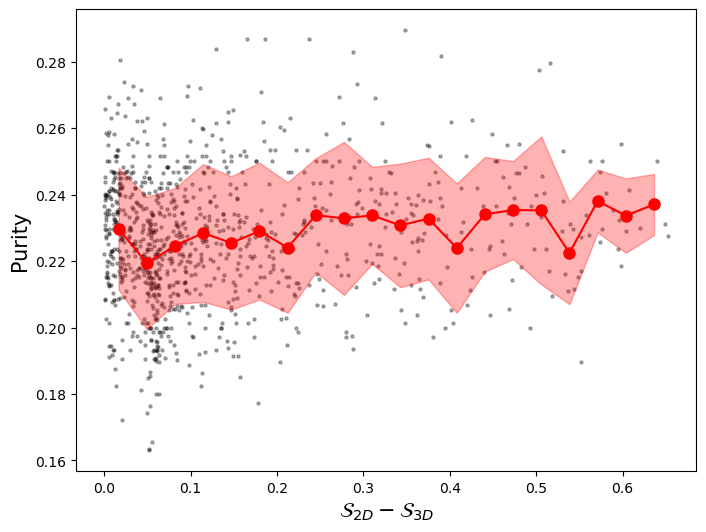

In [43]:
purity = np.array(df['Purity'])
purity_err = np.array(df['Purity Uncertainty'])

x = tri_metric_arr
y = purity

num_bins = 20 
bins = np.linspace(min(x), max(x), num_bins + 1)
bin_indices = np.digitize(x, bins) - 1

# Compute statistics per bin (mean, median, etc.)
bin_means = np.array([np.mean(y[bin_indices == i]) if np.any(bin_indices == i) else np.nan for i in range(num_bins)])
bin_std = np.array([np.std(y[bin_indices == i]) if np.any(bin_indices == i) else np.nan for i in range(num_bins)])
bin_centers = (bins[:-1] + bins[1:]) / 2  # Compute bin centers

# Plot original data as scatter
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=5, c ='k', alpha = 0.3)

# Plot binned means as points or line
plt.plot(bin_centers, bin_means, 'ro-', markersize=8)
plt.fill_between(bin_centers, bin_means - bin_std, bin_means + bin_std, color='red', alpha=0.3)

plt.xlabel(r'$ \mathcal{S}_{2D} - \mathcal{S}_{3D}$', fontsize = 15)
plt.ylabel('Purity', fontsize = 15)